In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_filename = "Seattle_Pet_Licenses.csv"
df = pd.read_csv(data_filename)
df['DATETIME'] = pd.to_datetime(df['License Issue Date'])
df['YEAR'] = df['DATETIME'].dt.year
df['YEAR_MONTH'] = df['DATETIME'].dt.year.astype(
    str) + '-' + df['DATETIME'].dt.month.astype(str)
df['MONTH'] = df['DATETIME'].dt.month


Text(0.5, 1.0, 'Pet Species Distribution')

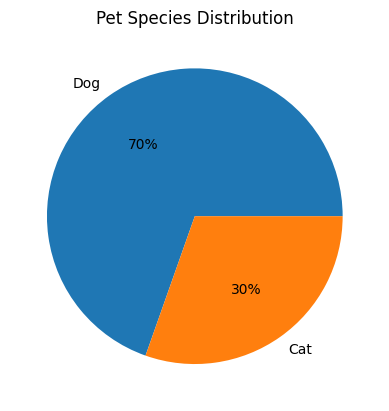

In [48]:
# Pie Chart
df_pie = df['Species'].value_counts()
df_pie = df_pie.drop(['Goat', 'Pig'])

fix, ax = plt.subplots()
ax.pie(df_pie.values, labels=df_pie.index, autopct='%1.f%%')
ax.set_title('Pet Species Distribution')


Text(0.5, 1.0, 'Pet Registrations by Year')

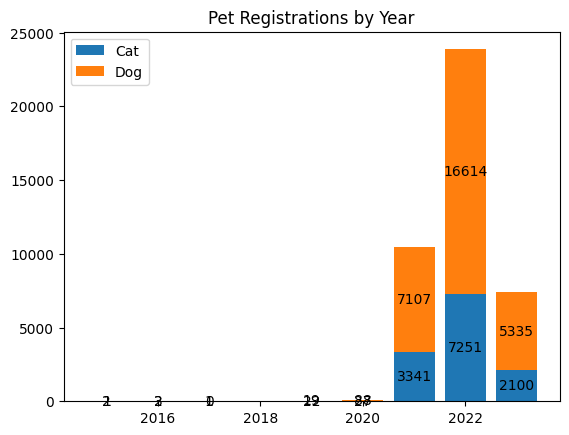

In [49]:
# Dog vs. Cat Barchart
barchart_data = df.pivot_table(
    values='License Number', index='YEAR', columns='Species', aggfunc=np.count_nonzero)
barchart_data = barchart_data.drop(labels=['Goat', 'Pig'], axis='columns')
barchart_data['Cat'] = barchart_data['Cat'].fillna(0)

x_label = barchart_data.index.values
species_counts = {
    'Cat': barchart_data['Cat'].array,
    'Dog': barchart_data['Dog'].array
}

fix, ax = plt.subplots()
bottom = np.zeros(barchart_data.shape[0])

for species, species_count in species_counts.items():
    p = ax.bar(x_label, species_count, label=species, bottom=bottom)
    bottom += species_count
    ax.bar_label(p, label_type='center')
ax.legend()
ax.set_title('Pet Registrations by Year')


Text(0.5, 1.0, 'pet registrations by year (Cumulative)')

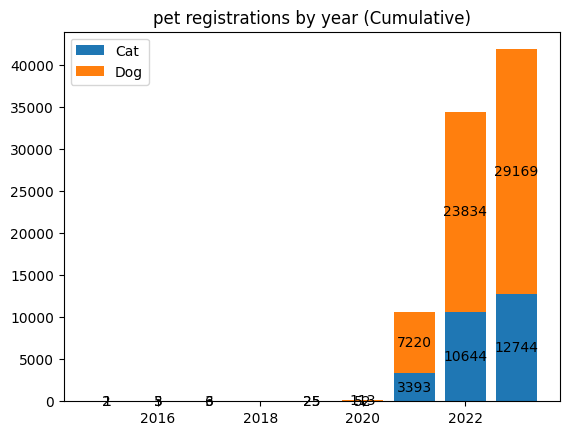

In [50]:
# dog vs. cat barchart cumulative

# get cumulative registration data
barchart_data_cum = barchart_data
barchart_data_cum['Dog'] = barchart_data['Dog'].cumsum()
barchart_data_cum['Cat'] = barchart_data['Cat'].cumsum()

x_label = barchart_data_cum.index.values
species_counts = {
    'Cat': barchart_data_cum['Cat'].array,
    'Dog': barchart_data_cum['Dog'].array
}

fix, ax = plt.subplots()
bottom = np.zeros(barchart_data_cum.shape[0])

for species, species_count in species_counts.items():
    p = ax.bar(x_label, species_count, label=species, bottom=bottom)
    bottom += species_count
    ax.bar_label(p, label_type='center')
ax.legend()
ax.set_title('pet registrations by year (Cumulative)')


Text(0.5, 1.0, 'Most Popular Dog Breeds')

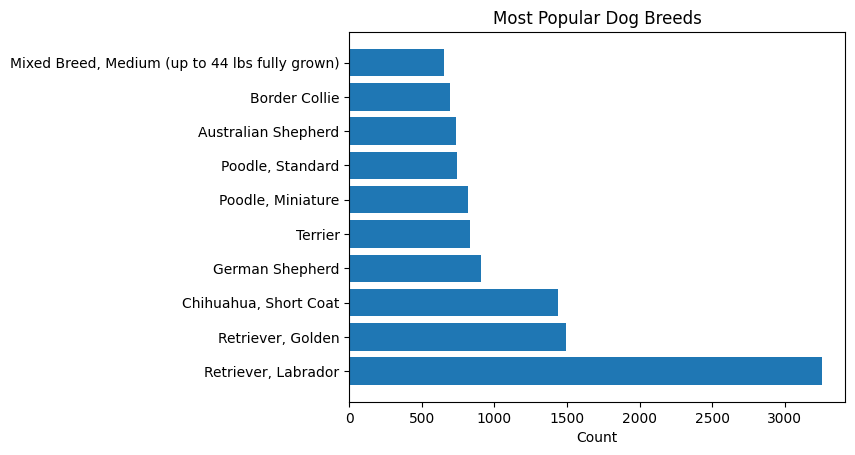

In [51]:
# most popular dog breeds
df_dog = df[df['Species'] == 'Dog']
dogs = df_dog['Primary Breed'].value_counts().head(10)

fix, ax = plt.subplots()
breeds = dogs.index
breed_count = dogs.values
y_pos = np.arange(len(breeds))
ax.barh(y_pos, breed_count)
ax.set_yticks(y_pos, labels=breeds)
ax.set_xlabel('Count')
ax.set_title('Most Popular Dog Breeds')


Text(0.5, 1.0, 'Most Popular Cat Breeds')

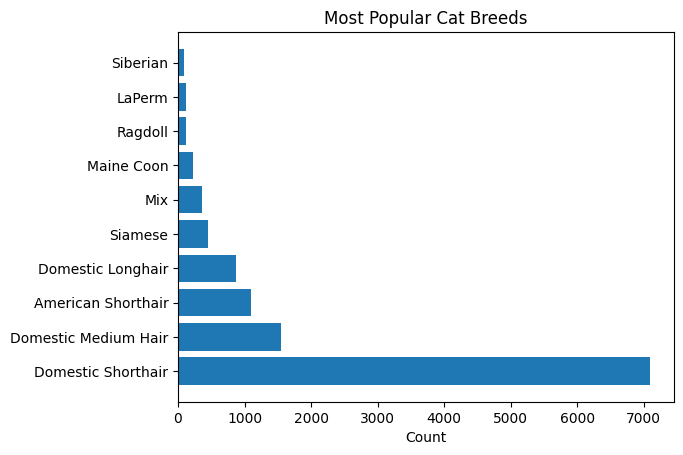

In [52]:
# most popular cat breeds
df_cat = df[df['Species'] == 'Cat']
cats = df_cat['Primary Breed'].value_counts().head(10)

fix, ax = plt.subplots()
breeds = cats.index
breed_count = cats.values
y_pos = np.arange(len(breeds))
ax.barh(y_pos, breed_count)
ax.set_yticks(y_pos, labels=breeds)
ax.set_xlabel('Count')
ax.set_title('Most Popular Cat Breeds')


Text(0.5, 1.0, 'Cat to Dog Ratio by Zip Code')

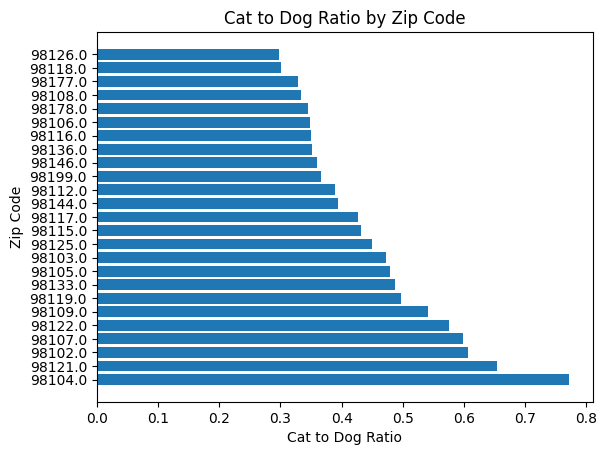

In [53]:
df_ratio = df.pivot_table(values='License Number', index='ZIP Code', columns='Species',
                          aggfunc=np.count_nonzero)
df_ratio = df_ratio.drop(labels=['Goat', 'Pig'], axis='columns')
df_ratio.fillna(1)
df_ratio['RATIO'] = df_ratio['Cat'] / df_ratio['Dog']
df_ratio['TOTAL'] = df_ratio['Cat'] + df_ratio['Dog']
df_ratio = df_ratio[df_ratio['TOTAL'] > 100]
df_ratio = df_ratio.sort_values(by='RATIO', ascending=False)

zip_codes = df_ratio.index
y_pos = np.arange(df_ratio.shape[0])
ratio = df_ratio['RATIO'].array

fig, ax = plt.subplots()
ax.barh(y_pos, ratio)
ax.set_yticks(y_pos, labels=zip_codes)
ax.set_xlabel('Cat to Dog Ratio')
ax.set_ylabel('Zip Code')
ax.set_title('Cat to Dog Ratio by Zip Code')


# Gender Analysis
To analyze the gender distribution in the registration data, we used the Python package called gender-guesser. This package uses a dictionary of names and their gender associations to identify and classify names. We cloned the GitHub library into our repository using the command:

```
git clone https://github.com/lead-ratings/gender-guesser.git
```

However, since this is not a module within the running directory and wasn't part of the path search libraries, we had to add it to the system path variable. Please note that for Unix-based systems, the forward slash should be adjusted. Here is the code we used to add the module to the system path:

```
import os
import sys

current_directory = os.getcwd()
gender_directory = 'gender-guesser'
sys.path.append(current_directory + '\\' + gender_directory + '\\' )
```

In [54]:
# Import gender analysis module
import os
import sys

current_directory = os.getcwd()
gender_directory = 'gender-guesser'
sys.path.append(current_directory + '\\' + gender_directory + '\\')


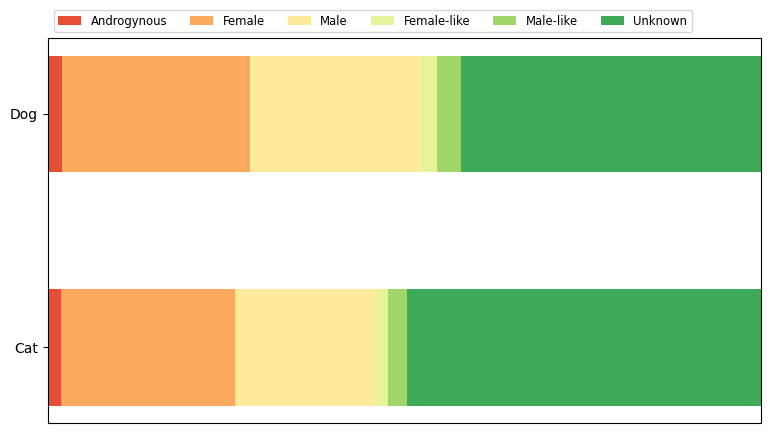

In [55]:
# Gender Analysis
import gender_guesser.detector as gender
d = gender.Detector()


def pct_of_total(value: float, sum: float) -> list:
    return value / sum


df['GENDER'] = df['Animal\'s Name'].apply(lambda x: d.get_gender(x))

df_gender = df.pivot_table(values='License Number', columns='Species',
                           index='GENDER', aggfunc=np.count_nonzero)
df_gender = df_gender.drop(labels=['Goat', 'Pig'], axis='columns')
df_gender['Dog_Rel'] = df_gender['Dog'].apply(
    pct_of_total, args=(df_gender['Dog'].sum(),))
df_gender['Cat_Rel'] = df_gender['Cat'].apply(
    pct_of_total, args=(df_gender['Cat'].sum(),))

# update index names
new_index_values = ['Androgynous', 'Female',
                    'Male', 'Female-like', 'Male-like', 'Unknown']
df_gender = df_gender.set_index(pd.Index(new_index_values))

results = {
    'Dog': df_gender['Dog_Rel'].array,
    'Cat': df_gender['Cat_Rel'].array,

}

category_names = df_gender.index


labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.colormaps['RdYlGn'](
np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)

r, g, b, _ = color
text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
    loc='lower left', fontsize='small')




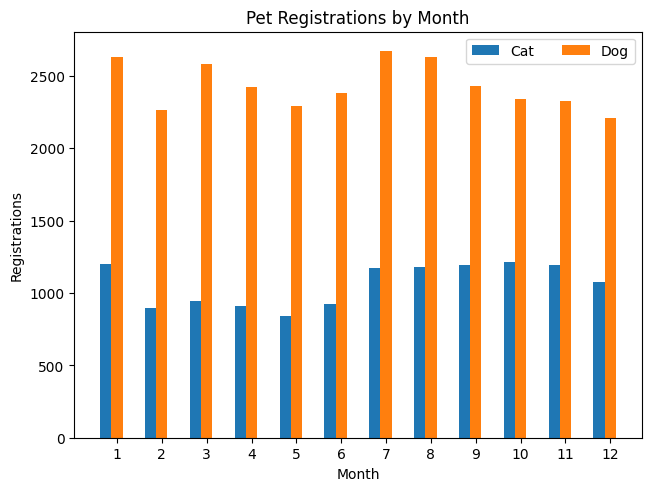

In [68]:
# Most popular registration months
df_reg = df.pivot_table(values='License Number', index='MONTH', columns='Species', aggfunc=np.count_nonzero)
df_reg = df_reg.drop(labels=['Pig', 'Goat'], axis='columns')

x_labels = df_reg.index
values = {
    'Cat': df_reg['Cat'].array,
    'Dog': df_reg['Dog'].array
}

width = 0.25
multiplier = 0

x = np.arange(df_reg.shape[0])

fix, ax = plt.subplots(layout='constrained')

for month, value in values.items():
    offset = width * multiplier
    rects = ax.bar(x+offset, value, width, label=month)
    multiplier += 1

ax.set_ylabel('Registrations')
ax.set_xlabel('Month')
ax.set_title('Pet Registrations by Month')
ax.set_xticks(x + width, x_labels)
ax.legend(loc='upper right', ncols=2)